In [1]:
# Wireless Sensor Network
# Author: Han Chen
# Plot library: matplotlib, networkx
import networkx as nx
from matplotlib import pyplot as plt
import random as rd
import math
import copy
import time
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
# Sphere with radius 1
a = time.time()

# parameter
n = 4000
th = 0.4
print 'Estimated Threshold: ', th

v={}  # vertices

for i in range(1,n+1):
    x=(rd.random()-0.5)*2
    y=(rd.random()-0.5)*2
    z=(rd.random()-0.5)*2
    d = math.sqrt(x*x+y*y+z*z)
    x=x/d
    y=y/d
    z=z/d
    v[i]=(x,y,z)

print 'OK', (time.time()-a)/60

# convert RGG into adjacency lists
adj={}
for i in range(1,n+1):
    adj[i]=[]
    
# sort according to x-coordinate
v_sorted=sorted(v,key=lambda i:v[i][0])
print 'Sorted OK', (time.time()-a)/60

# Record edges while transformation
edges=[]
num_edge=0

progress=0
# plane sweep to find adjacenct vertices
for i in range(1,n+1):
    key = v_sorted[i-1]
    if i%6400==0:
        progress+=1
        print 'Progress {0:2d}%'.format(progress*10), (time.time()-a)/60,'minutes elapsed.'
        
    j=0
    cur = {}
    for j in range (i+1,n+1):
        temp = v_sorted[j-1]
        if(v[temp][0]-v[key][0]>th): 
            break
        cur[temp]=v[temp]
    cur_sorted=sorted(cur, key=lambda i:cur[i][1])
    for k in cur_sorted:
        if(v[k][1]-v[key][1]>th):
            break
        v12=v[key][0]*v[k][0]+v[key][1]*v[k][1]+v[key][2]*v[k][2]
        v1=v[key][0]**2+v[key][1]**2+v[key][2]**2
        v2=v[k][0]**2+v[k][1]**2+v[k][2]**2
        dis = 1*math.acos(v12/(math.sqrt(v1)*math.sqrt(v2)))    
        if(dis<=th):
            adj[key].append(k)
            adj[k].append(key)
            #edges.append((key,temp))
            num_edge+=1
            
print 'Number of edges: ', num_edge


Estimated Threshold:  0.4
OK 0.000183335940043
Sorted OK 0.000266667207082
Number of edges:  341223


Max Degree:  244
Min Degree:  78
Average Degree:  170


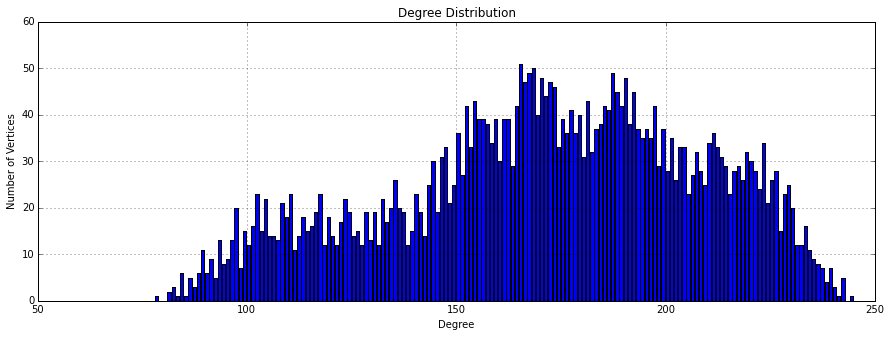

In [3]:
# bucket sort vertices by degrees

# buckets dict
# key: degree, value: vertices
adj_sorted={} 

# average degree
avg_deg= 0

# bucket sort
for i in adj:
    temp = len(adj[i])
    if adj_sorted.has_key(temp) is False:
        adj_sorted[temp]=[]
    adj_sorted[len(adj[i])].append(i)
    avg_deg += len(adj[i])

# vertices ordered by degree
degree=[]    
for i in adj_sorted:
    for j in adj_sorted[i]:
        degree.append(j)

# print max, min, avg degree
max_deg = len(adj[degree[n-1]])
min_deg = len(adj[degree[0]])
print 'Max Degree: ', max_deg
print 'Min Degree: ', min_deg
print 'Average Degree: ', avg_deg/n

# plot degree figure
# x: degree, y: number of vertices
x=[i for i in adj_sorted.keys()]
y=[len(adj_sorted[i]) for i in adj_sorted.keys()]


fig = plt.figure(figsize=(15,5))
plt.ylabel('Number of Vertices')
plt.xlabel('Degree')
plt.title('Degree Distribution')
plt.bar(x,y)
#plt.axis([0,max_deg+1,0,200])
plt.grid('on')


C:\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


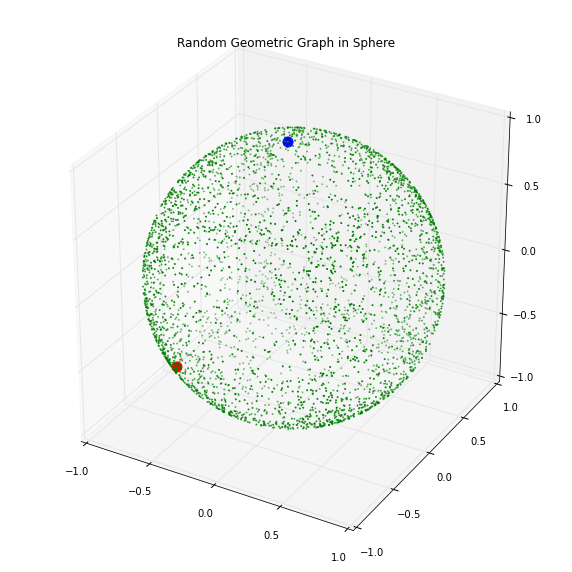

In [4]:
# plot the graph using mplot3d

# vertex with max degree and min degree
max_vertex = degree[n-1]
min_vertex = degree[0]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)


x=[v[i][0] for i in v]
y=[v[i][1] for i in v]
z=[v[i][2] for i in v]

ax.scatter(x, y, z,color='g',s=1)
ax.scatter(v[max_vertex][0],v[max_vertex][1],v[max_vertex][2],color='r',s=100)
ax.scatter(v[min_vertex][0],v[min_vertex][1],v[min_vertex][2],color='b',s=100)
plt.title('Random Geometric Graph in Sphere')

In [5]:
# smallest-last ordering 
# input: adj_sorted(sorted adjacency lists by degree)
# output: 1. smallest last ordered vertices list
# output: 2. list of degree for each vertex when removed from graph

# input
adj_sl = copy.deepcopy(adj)

# vertices after smallest last ordering
sl_v=[]
# degrees when a vertex deleted, vertices ordered by sl
sl_deg=[]

# Max min-degree when deleted
for a in range(1,n+1):
    for i in adj_sorted: 
        if(len(adj_sorted[i])!=0):           # find the vertex with smallest degree
            j = adj_sorted[i][0]      
            sl_v.insert(0,j)                 # insert that vertex to the head of sl list 
            sl_deg.insert(0,len(adj_sl[j]))  # record its degree when deleted
            for k in adj_sl[j]:              # for each neighbor(vertex in its adj_list)
                d = len(adj_sl[k])           # find its degree
                adj_sl[k].remove(j)          # remove that vertex from its neighbors adj_list
                adj_sorted[d].remove(k)      # decrement its degree by 1
                if adj_sorted.has_key(d-1) is False:
                    adj_sorted[d-1]=[]
                adj_sorted[d-1].append(k)              
            adj_sorted[i].remove(j)          # remove that node from sorted adj     
            break
            
print 'Max min-degree when deleted: ', max(sl_deg)

Max min-degree when deleted:  110


Terminal Clique Size:  100


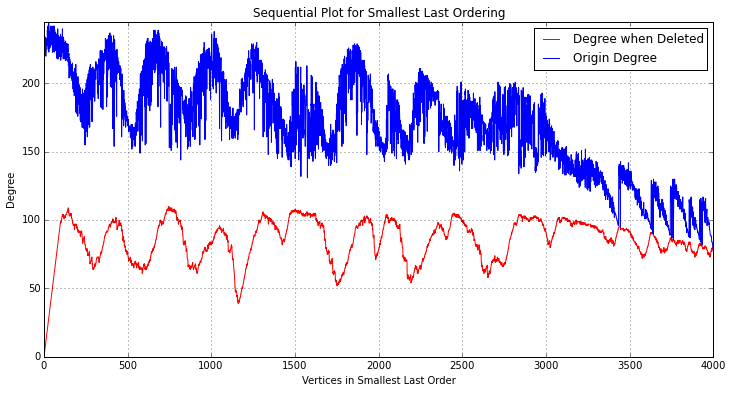

In [6]:
# sequential plot in smallest last order
# 1. degree when deleted
# 2. origin degree

x = [i for i in range(1,n+1)]
y1 = sl_deg                         # degree when deleted
y2 = [len(adj[i]) for i in sl_v]    # origin degree

plt.figure(figsize=(12,6))
plt.axis([0,n+1,0,max_deg+1])
plt.plot(x,y1,'r',label='Degree when Deleted')
plt.plot(x,y2,'b',label='Origin Degree')
plt.title('Sequential Plot for Smallest Last Ordering')
plt.xlabel('Vertices in Smallest Last Order')
plt.ylabel('Degree')
plt.legend()
plt.grid('on')

# also find the terminal clique size
clique_size = 1
for i in range(1,n):
    if(sl_deg[i]>sl_deg[i-1]):
        clique_size+=1
    else:
        break
        
print 'Terminal Clique Size: ', clique_size

Number of Colors:  100
Size of Max Color Class:  65


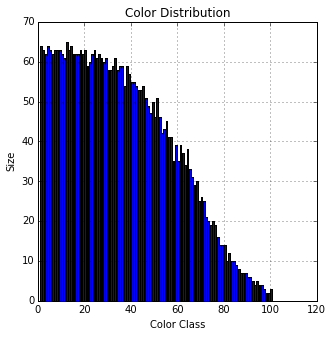

In [7]:
# graph coloring 
# color vertices in the graph in smallest last order

# input: adjacency list
adj=adj
# input: smallest last order
sl_v = sl_v
# parameter
color_num = clique_size
# output:
color={}

# initialize color clasee
for i in range(1,color_num+1):
    color[i]=[]
#
color_init = [0]*(n+1)

# color the graph
for i in sl_v:
    avail = [True]*(color_num+1)                # available color from 0 to num_color
    for j in adj[i]:                            # remove those no longer available
        avail[color_init[j]]=False
    k = 0
    for k in range(1,color_num+1):
        if avail[k]:
            break
    color[k].append(i)
    color_init[i]=k  


# find the size of max color class
max_color_size=0
for i in color:
    temp =  len(color[i])
    if temp>max_color_size:
        max_color_size= temp

print 'Number of Colors: ', len(color)
print 'Size of Max Color Class: ', max_color_size
    
# plot color distribution
x = [i for i in color]
y = [len(color[i]) for i in color]

plt.figure(figsize=(5,5))
plt.bar(x,y)
plt.title('Color Distribution')
plt.xlabel('Color Class')
plt.ylabel('Size')
plt.grid('on')

In [8]:
# Backbone bipartite 
# from two of the first 4 class


# source color classes
c1 = 1
c2 = 2




## find edges in largest component in bipartite backbone
## using breadth first search
def bfsBB(bbis1,bbis2,adj):
    ## record vertices in both independent sets
    bb = [0]*(len(adj)+1)
    for i in bbis1+bbis2:
        bb[i]=1
    ## find vertex with most connections in these two indpendent sets
    root = 0
    root_deg = -1
    for i in bbis1+bbis2:
        cnt = 0
        for j in adj[i]:
            cnt += bb[j]
        if cnt>root_deg:
            root_deg = cnt
            root = i
    ## bfs to find edges in this component starting with root
    backbone={}
    backbone[0]=[] #initialize backbone vertices
    backbone[1]=[] #initialize backbone edges
    q = []
    q.append(root)
    backbone[0].append(root)
    bb[root]=0
    while len(q) is not 0:
        temp = len(q)
        for i in range(0,temp):
            vet = q.pop(0)
            for j in adj[vet]:
                if bb[j]==1:
                    q.append(j)
                    bb[j]=0
                    backbone[0].append(j)
                    backbone[1].append((vet,j))
    ##
    return backbone


# find the two largest components from 6 possible bipratite subgraph
backbone12 = bfsBB(color[1],color[2],adj)
backbone13 = bfsBB(color[1],color[3],adj)
backbone14 = bfsBB(color[1],color[4],adj)
backbone23 = bfsBB(color[2],color[3],adj)
backbone24 = bfsBB(color[2],color[4],adj)
backbone34 = bfsBB(color[3],color[4],adj)


print 'Largest Components of Color 1 and 2: ', len(backbone12[1]), len(backbone12[0])
print 'Largest Components of Color 1 and 3: ', len(backbone13[1]), len(backbone13[0])
print 'Largest Components of Color 1 and 4: ', len(backbone14[1]), len(backbone14[0])
print 'Largest Components of Color 2 and 3: ', len(backbone23[1]), len(backbone23[0])
print 'Largest Components of Color 2 and 4: ', len(backbone24[1]), len(backbone24[0])
print 'Largest Components of Color 3 and 4: ', len(backbone34[1]), len(backbone34[0])



Largest Components of Color 1 and 2:  126 127
Largest Components of Color 1 and 3:  125 126
Largest Components of Color 1 and 4:  127 128
Largest Components of Color 2 and 3:  124 125
Largest Components of Color 2 and 4:  126 127
Largest Components of Color 3 and 4:  125 126


In [9]:
# plot the selected bipartite subgraph and backbone

# backbone source (argument)
############################
backbone = backbone24#
c1 = 2
c2 = 4

## bipartite independent set 1
bbis1 = color[c1]
## bipartite independent set 2
bbis2 = color[c2]

# vertices in backbone
nodelist = bbis1+bbis2
# edges in backbone
edgelist = []

bb = [0]*(n+1)
for i in bbis2:
    bb[i]=1
for i in bbis1:
    for j in adj[i]:
        if bb[j]==1:
            edgelist.append((i,j))
            
# Determine the dominant ratio of this backbone

bb_bbis1= [] # vertices in the backbone from color 1
bb_bbis2= [] # vertices in the backbone from color 2



for i in backbone[0]:
    for j in bbis1:
        if i==j:
            bb_bbis1.append(j)
    for k in bbis2:
        if i==k:
            bb_bbis2.append(k)
            
# edges in backbone
edgelist = []

bb_edge = [0]*(n+1)
for i in bb_bbis2:
    bb_edge[i]=1
for i in bb_bbis1:
    for j in adj[i]:
        if bb[j]==1:
            edgelist.append((i,j))

# determine coverage
covered_v =[0]*(n+1)
for i in backbone[0]:
    for j in adj[i]:
        covered_v[j]=1

domin_per = sum(covered_v)/float(n)

print 'Dominant Percentage: ', domin_per


Dominant Percentage:  1.0


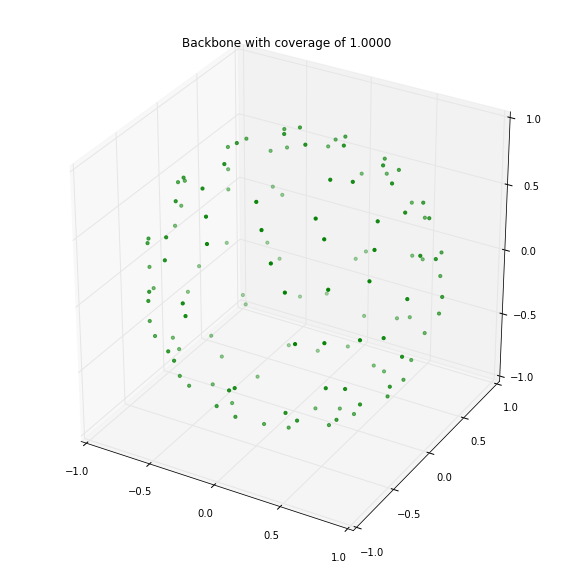

In [10]:
# plot
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)


x=[v[i][0] for i in backbone[0]]
y=[v[i][1] for i in backbone[0]]
z=[v[i][2] for i in backbone[0]]

ax.scatter(x, y, z,color='g',s=10)

plt.title('Backbone with coverage of {0:1.4f}'.format(domin_per))

C:\Anaconda2\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


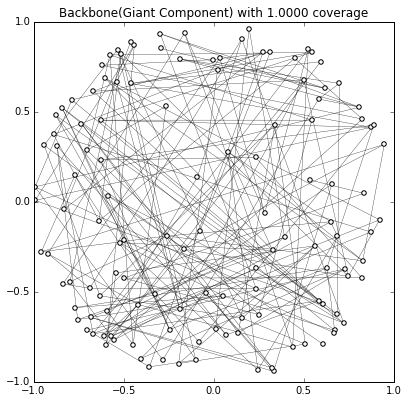

In [13]:
## projection
g = nx.Graph()
g.add_nodes_from(backbone[0])
g.add_edges_from(edgelist)
pos = []
for i in v:
    pos.append((v[i][0],v[i][1]))

# plot
plt.figure(figsize=(5,5))

nx.draw(g,pos, node_size=20, node_color='w',width=0.3)
#nx.draw_networkx_edges(g,v,edgelist=edgelist,edge_color='k',width=0.3)
plt.axis('on')
plt.axis([-1,1,-1,1])
plt.legend(bbox_to_anchor=(1.8,1))
plt.title('Backbone(Giant Component) with {0:1.4f} coverage'.format(domin_per))